In [1]:
#@title Librerias

import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.integrate import quad, trapezoid, simpson, tplquad, fixed_quad # Integracón
from scipy.interpolate import CubicSpline, interp1d, lagrange # Interpolación
from scipy.optimize import fsolve, root_scalar, newton # Raíces
from scipy.stats import linregress # Regresión
import sympy as sp # Simbólica

# Parcial I - Métodos Computacionales
**2024-2**

---

*Nombre:*

*Identificación:*

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub del curso y recuerde hacer pull-request

# 1

**(40 puntos)** La velocidad del agua $v$ [m/s] en la descarga de un tanque cilindrico a través de un tubo largo (como se muestra en la figura) se puede calcular como:

$$
v = \sqrt{2gH}\tanh{\left(\frac{\sqrt{2gH}}{2L}t\right)}
$$



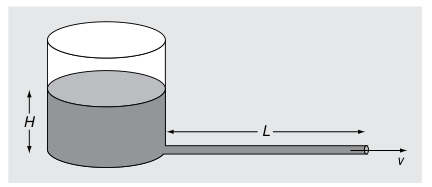

In [7]:
g=9.81

#funcion explicita
def velocidad(g,H,L,t):
  v=np.sqrt(2*g*H)*np.tanh(np.sqrt(2*g*H)*t/2*L)
  return v

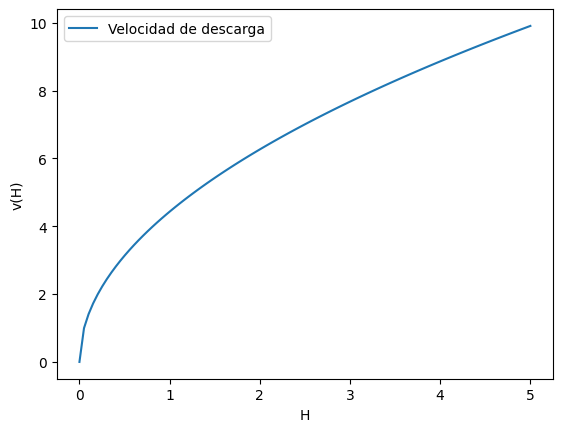

In [10]:
#grafico de v

H_valores=np.linspace(0,5,100)

plt.plot(H_valores,velocidad(g,H_valores,4,2.5),label='Velocidad de descarga')
plt.xlabel('H')
plt.ylabel('v(H)')
plt.legend()
plt.show()

La grafica muestra que la raiz esta entre 1 y 2

In [53]:
#queremos encontrar la raiz de una funcion que con tiene a H para ciertos valores y asi resolver la ecuacion trascedental

#valores
v_d=5
t=2.5
L=4
H_valores_raiz=np.linspace(0,1.5,100)

def f_raiz(H):
  #valores
  v_d=5
  t=2.5
  L=4

  term_tanh=np.tanh(np.sqrt(2*g*H)*t)/(2*L)
  term_raiz=np.sqrt(2*g*H)
  term_final=v_d/(term_tanh*term_raiz)

  return term_final



#plt.plot(H_valores_raiz,f_raiz(H_valores_raiz),color='red',label='funcion')
#plt.legend()
#plt.show()

In [32]:
def METODO_BISECCION(f, a, b, tol):
    while (b - a)/2 > tol:
        c = (a + b)/2

        if f(c) == 0 :
            return c

        elif f(a)*f(c) < 0:
            b = c
        else:
            a = c

    return (a + b)/2


In [49]:
raiz_biseccion=METODO_BISECCION(f_raiz,1,2,1e-7)
raiz_biseccion


1.9999999403953552

donde $g$ = 9.81 m/s$^2$, H es la carga hidrostática inicial (m), L la longitud del tubo (m) y $t$ el tiempo transcurrido (s).

*a)* Escriba una función explicita para encontrar la velocidad de descarga en función de las variables asociadas.

*b)* Realice un gráfico de $v(H)$ para $0\leq H\leq 5$, con $L = 4$ m y para $t = 2.5$ s

*c)* Suponga que quiere conocer la carga hidrostática necesaria para tener una velocidad de 5 m/s transcurridos 2.5 s. Identifique gráficamente este valor.

*d)* Realice una función que encuentre la raiz usando el método de bisección con una tolerancia de 1e-7, para esto puede modificar el siguiente pseudo-código:


```python
MÉTODO BISECCIÓN(f, a, b, tol)
    MIENTRAS (b - a)/2 > tol HACER
        c = (a + b)/2
        
        SI f(c) = 0 ENTONCES
            RETORNAR c
        
        SI f(a)*f(c) < 0 ENTONCES
            b = c
        SINO
            a = c
        FIN SI
    FIN MIENTRAS
    
    RETORNAR (a + b)/2
FIN MÉTODO
```

*e)* Usando el método de `scipy.newton` encuentre el valor de la raiz

```python
# Método de Newton
root = newton(f, x0, fprime)  # fprime es la derivada
```

Compare sus respuestas con el numeral anterior y obtenga el error relativo.


In [103]:
y_grad=f_raiz(H_valores)
fprime=np.gradient(y_grad)
print(fprime)
grad_int=lagrange(H_valores,fprime)

[       -inf        -inf -8.7664095  -4.18508261 -2.61856568 -1.84430406
 -1.39155578 -1.09897671 -0.89673266 -0.74993812 -0.63935612 -0.5535761
 -0.48543714 -0.43023824 -0.38477728 -0.34680489 -0.31469904 -0.28726353
 -0.26359874 -0.2430164  -0.22498185 -0.20907414 -0.19495772 -0.18236223
 -0.17106764 -0.1608932  -0.15168928 -0.14333096 -0.13571332 -0.12874757
 -0.12235817 -0.11648048 -0.11105889 -0.10604533 -0.10139805 -0.09708065
 -0.09306124 -0.0893118  -0.0858076  -0.08252674 -0.0794498  -0.07655945
 -0.07384023 -0.07127829 -0.06886116 -0.06657764 -0.06441762 -0.06237193
 -0.06043229 -0.05859115 -0.05684165 -0.05517752 -0.05359305 -0.05208299
 -0.05064255 -0.0492673  -0.0479532  -0.0466965  -0.04549376 -0.04434177
 -0.0432376  -0.04217852 -0.04116197 -0.04018562 -0.03924727 -0.03834487
 -0.03747654 -0.0366405  -0.03583508 -0.03505875 -0.03431006 -0.03358763
 -0.03289021 -0.0322166  -0.03156568 -0.03093638 -0.03032772 -0.02973876
 -0.02916861 -0.02861646 -0.02808151 -0.02756303 -0.

<ipython-input-53-fee85a820f7f>:17: RuntimeWarning: divide by zero encountered in divide
  term_final=v_d/(term_tanh*term_raiz)
/usr/local/lib/python3.11/dist-packages/numpy/lib/polynomial.py:844: RuntimeWarning: invalid value encountered in add
  val = a1 + a2


In [105]:
# Método de Newton
root = newton(f_raiz,x0=2,grad_int)  # fprime es la derivada

SyntaxError: positional argument follows keyword argument (<ipython-input-105-c8b8459849cd>, line 2)

In [65]:
newton?


In [ ]:
error=(raiz_biseccion-root)/raiz_biseccion

# 2

**(30 puntos)** Usualmente algunas reacciones quimicas siguen el siguiente modelo:

$$
\frac{dc}{dt} = -kc^n
$$

donde $c$ es la concentración, $t$ el tiempo, $k$ la tasa de la reacción y $n$ su orden. Usando los siguientes datos:



```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])
```


*a)* Conociendo que el método de diferencias finitas se puede escribir como:

###  Diferencias finitas hacia adelante:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{h}
$$

### Diferencias finitas hacia atrás:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{h}
$$

### Diferencias finitas centradas:
Aproximación de segundo orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{2h}
$$

Escribe una función explicita que calcule $dc/dt$ usando el método de diferencias finitas a partir de los valores de $c$ y $t$, luego grafique en función de t. *Ayuda: No es necesario interpolar*

*b)* Compare el resultado anterior con `numpy.gradient`, se acercan?

*c)* Linealice la ecuación inicial (para esto puede usar log) y encuentre los valores correspondientes a $k$ y $n$



```python
# Realizar el ajuste lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)
```

*d)* Finalmente, usando los valores de $k$ y $n$ grafique $dc/dt$ y compare con los datos de la tabla. ¿Se comportan igual, determine el error máximo?




In [67]:
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])

In [85]:
gradient=np.gradient(c,t)

In [91]:
#diferencias finitas

def dif_finit(t):
  adelante=np.zeros(len(t))
  atras=np.zeros(len(t))
  centrada=np.zeros(len(t))
  dif_f=np.zeros(len(t))

  if (i==0):
    adelante[i]=(c[i+1]-c[i])/(t[i+1]-t[i])
    dif_f[0]=adelante[i]

  for i in range(1,lent(t)-1):
    atras[i]=(c[i]-c[i-1])/(t[i]-t[i-1])
    dif_f[i]=atras[i]

  if (i==len(t)):
    centrada[i]=(c[i+1]-c[i-1])/(t[i+1]-t[i-1])
    dif_f=centrada[len(t)]

  return dif_f

In [92]:
plt.plot(t,dif_finit(t))


plt.plot(t,gradient,'--', label='gradiente')

UnboundLocalError: cannot access local variable 'i' where it is not associated with a value

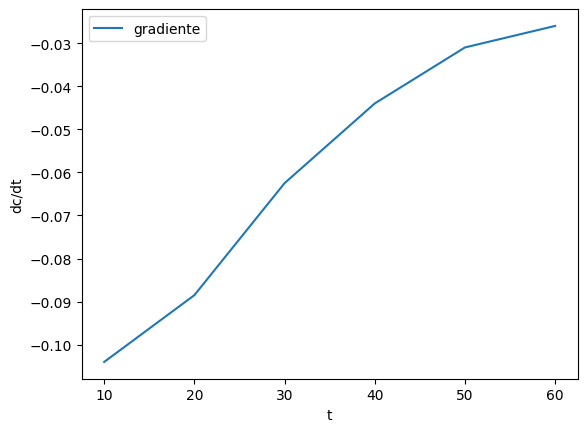

In [86]:
#grafica

plt.plot(t,gradient, label='gradiente')
plt.xlabel('t')
plt.ylabel('dc/dt')
plt.legend()


# 3
**(30 puntos)** Considere los  datos de concentración del punto anterior

```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([5.29, 6.24, 7.02, 7.68, 8.25, 8.77])
```

*a)* Realice un gráfico de $c(t)$

*b)* Usando la interpolación de `scipy.interpolate.lagrange` y de `scipy.interpolate.CubicHermiteSpline` obtenga el polinomio interpolador de lagrange llamado `poly_lagrange` y de Hermite `poly_Hermite` para los datos datos.

*c)* Conociendo que `scipy.interpolate.lagrange` devuelve un array tipo Polynomial, use la siguiente rutina para encontrar la derivada:

``` python
from numpy.polynomial.polynomial import Polynomial

# Convertir a un objeto Polynomial para facilitar la derivación
poly_coef = Polynomial(poly_lagrange.coef[::-1])  # Convertimos los coeficientes
derivative = poly_coef.deriv()  # Calculamos la derivada
```

Luego, grafique $dc/dt$ en función del tiempo $t$ y compare con la función
$$
\frac{dc}{dt} = -kc^n
$$

con $k = 3$ y $n = -2$

*d)* Realice un gráfico del error absoluto


